In [10]:
import os
import sys
import random

import numpy as np
import pandas as pd
import pylab as plt
import datetime
import sys

sys.path.append("../../fitsne/")
from fast_ctsne import fast_ctsne as fastc_tsne

sys.path.append("../../ctsne/")
from bhtsne import run_bh_tsne as ctsne

sys.path.append("../")
import dataset
import plot_utils
import evaluation
from pancreas_palettes import tech_colors, celltype_colors

import warnings
warnings.filterwarnings('ignore')


In [2]:
output_folder = f"./{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"
os.mkdir(output_folder)

data_folder = "pancreas"
figure_folder = output_folder

seed = 6
random.seed(seed)
np.random.seed(seed)

emb_config = {
    "theta": 0.5,
    "max_iter": 1000,
    "perplexity": 50,
    "keep_nonzero": 3,
    "seed": 42,
}


## Data

In [3]:
prior_col = "tech"
label_col = "celltype"
data_dict = dataset.get_dataset("pancreas", label_col=label_col, prior_col=prior_col)
X = data_dict["X"]
Y = data_dict["Y"]
data_df = data_dict["metadata_df"]
emb = {}
print(data_df.head())

palettes = {"celltype": celltype_colors, "tech": tech_colors}

     tech celltype
0  celseq    gamma
1  celseq   acinar
2  celseq    alpha
3  celseq    delta
4  celseq     beta


## t-SNE

In [4]:
beta = 1.0
emb["tsne"] = ctsne(X, labels=Y, beta=beta, verbose=True, **emb_config)
tsne_results = evaluation.evaluate_embedding(
    emb["tsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=50,
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=0.05,
    wandb_log=False,
)
tsne_results = pd.DataFrame(data={"x": emb["tsne"][:, 0], "y": emb["tsne"][:, 1]}).join(
    tsne_results
)
tsne_results.head()


alpha = 1.000000, beta = 1.000000


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


1.000000 1.000000 5 14890 50 0.500000 50.000000 2 1000 3
Read the 14890 x 50 data matrix successfully!
Using random seed: 42
Using no_dims = 2, perplexity = 50.000000, and theta = 0.500000
Computing input similarities...
Using K = 150 neighbors for every point.Building tree...
 - point 0 of 14890
 - point 10000 of 14890
Input similarities computed in 7.37 seconds (sparsity = 0.014909)!
Learning embedding...
Iteration 50: error is 94.873272 (50 iterations in 11.39 seconds)
Iteration 100: error is 83.842942 (50 iterations in 13.15 seconds)
Iteration 150: error is 75.531839 (50 iterations in 9.33 seconds)
Iteration 200: error is 73.529435 (50 iterations in 9.04 seconds)
Iteration 250: error is 3.558717 (50 iterations in 9.41 seconds)
Iteration 300: error is 2.708602 (50 iterations in 7.98 seconds)
Iteration 350: error is 2.392445 (50 iterations in 8.31 seconds)
Iteration 400: error is 2.205162 (50 iterations in 8.11 seconds)
Iteration 450: error is 2.079617 (50 iterations in 8.54 seconds)

100%|██████████| 744/744 [00:03<00:00, 205.63it/s]


,x,y,tech,celltype,laplacian,laplacian_celltype,k
0,-1.942934,-7.984932,celseq,gamma,-1.0,-1.0,50
1,-40.650516,1.922610,celseq,acinar,-1.0,-1.0,50
2,0.178181,-19.923678,celseq,alpha,-1.0,-1.0,50
3,-8.724007,7.784373,celseq,delta,-1.0,-1.0,50
4,-18.267619,15.609806,celseq,beta,-1.0,-1.0,50


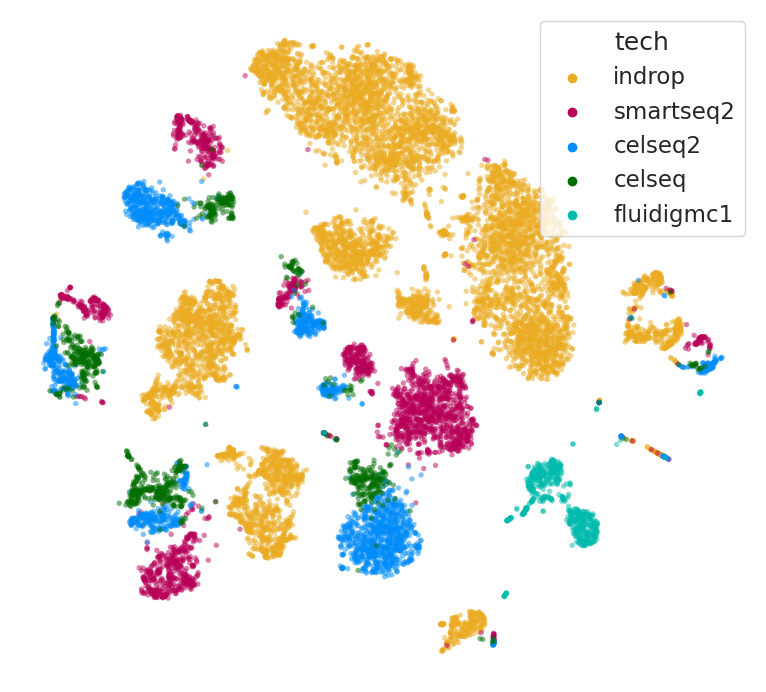

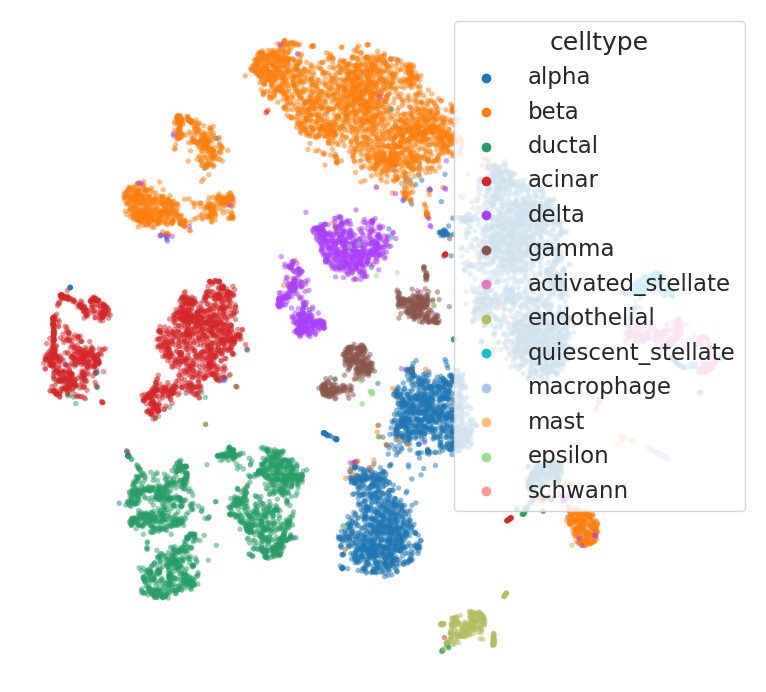

In [5]:
for cc in ["tech", "celltype"]:
    ax = plot_utils.plot_cell_embedding(
        embedding_df=tsne_results, color_col=cc, palette=palettes.get(cc, None), legend=True
    )
    plt.savefig(
        os.path.join(figure_folder, f"pancreas_{cc}_tsne.png"),
        dpi=300,
        bbox_inches="tight",
    )


## Conditional t-SNE

In [6]:
beta = 1e-3
emb["ctsne"] = ctsne(X, labels=Y, beta=beta, verbose=True, **emb_config)
ctsne_results = evaluation.evaluate_embedding(
    emb["ctsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=50,
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=0.05,
    wandb_log=False,
)
ctsne_results = pd.DataFrame(
    data={"x": emb["ctsne"][:, 0], "y": emb["ctsne"][:, 1]}
).join(ctsne_results)


alpha = 2.582890, beta = 0.001000
2.582890 0.001000 5 14890 50 0.500000 50.000000 2 1000 3
Read the 14890 x 50 data matrix successfully!
Using random seed: 42
Using no_dims = 2, perplexity = 50.000000, and theta = 0.500000
Computing input similarities...
Using K = 150 neighbors for every point.Building tree...
 - point 0 of 14890
 - point 10000 of 14890
Input similarities computed in 7.19 seconds (sparsity = 0.014909)!
Learning embedding...
Iteration 50: error is 94.873257 (50 iterations in 12.06 seconds)
Iteration 100: error is 82.921619 (50 iterations in 10.37 seconds)
Iteration 150: error is 79.266236 (50 iterations in 8.21 seconds)
Iteration 200: error is 78.400826 (50 iterations in 8.61 seconds)
Iteration 250: error is 4.017842 (50 iterations in 8.83 seconds)
Iteration 300: error is 3.071463 (50 iterations in 7.82 seconds)
Iteration 350: error is 2.817888 (50 iterations in 7.50 seconds)
Iteration 400: error is 2.677799 (50 iterations in 8.49 seconds)
Iteration 450: error is 2.5893

100%|██████████| 744/744 [00:03<00:00, 241.26it/s]


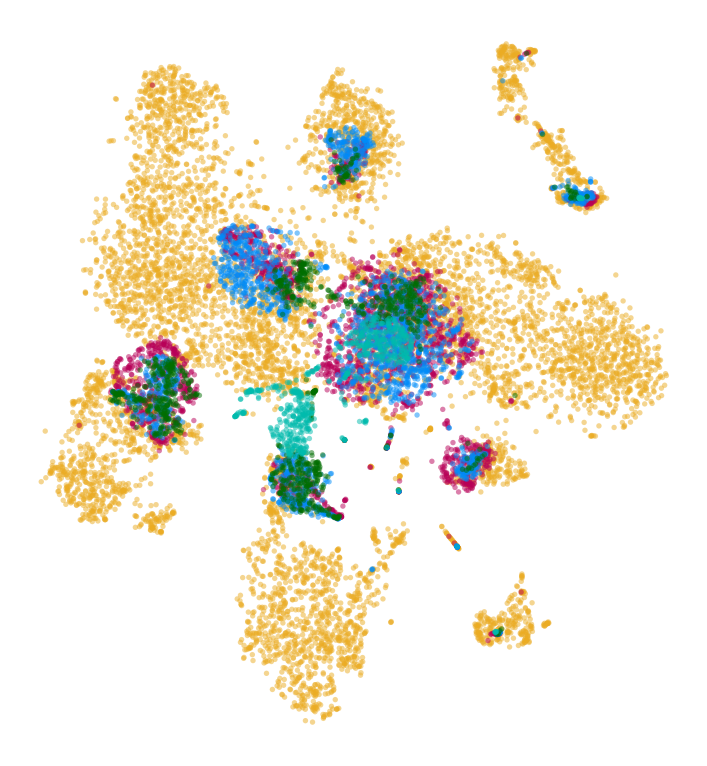

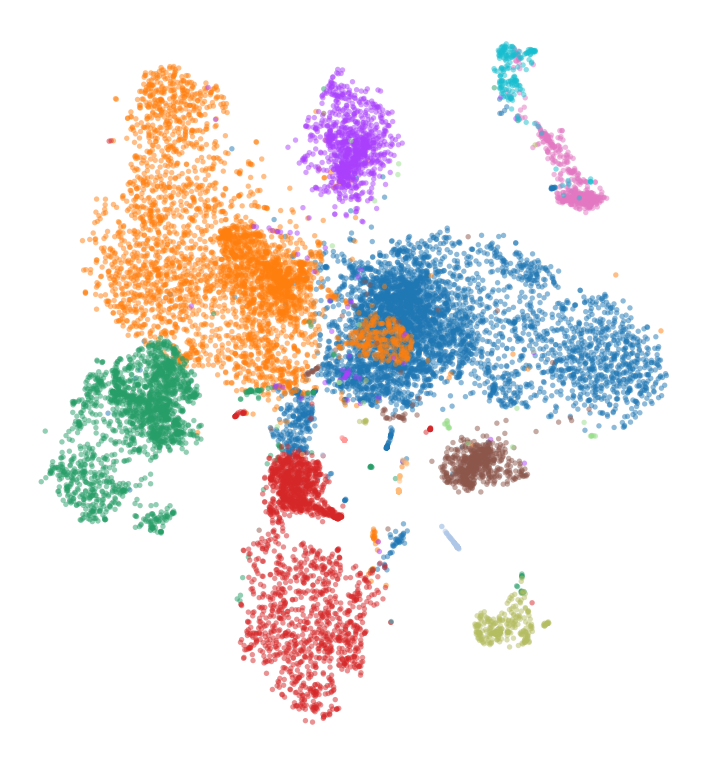

In [7]:
for cc in ["tech", "celltype"]:
    ax = plot_utils.plot_cell_embedding(
        embedding_df=ctsne_results, color_col=cc, palette=palettes.get(cc, None)
    )
    plt.savefig(
        os.path.join(figure_folder, f"pancreas_{cc}_ctsne.png"),
        dpi=300,
        bbox_inches="tight",
    )


## Revised Conditional t-SNE

In [8]:
# in the paper we flip 'alpha' and 'beta' for revised ct-SNE but in the code it 
# is not flipped and 'alpha' is the value that decreases the same-labeled similarities
alpha = 1e-10
emb["rev_ctsne"] = fastc_tsne(
    X, labels=Y, alpha=alpha, fixed_perp=False, print_output=True, **emb_config
)
rev_ctsne_results = evaluation.evaluate_embedding(
    emb["rev_ctsne"],
    metadata_df=data_df,
    data_dict=data_dict,
    n_neigh=50,
    prior_col=prior_col,
    secondary_col=label_col,
    evaluation_measures=["rnx", "laplacian"],
    sampling_frac=0.05,
    wandb_log=False,
)
rev_ctsne_results = pd.DataFrame(
    data={"x": emb["rev_ctsne"][:, 0], "y": emb["rev_ctsne"][:, 1]}
).join(rev_ctsne_results)


alpha = 0.000000, beta = 1.631124
=============== t-SNE v1.2.1 ===============
fast_tsne data_path: data_2023-02-15 14:42:56.500872-690725334.dat
fast_tsne result_path: result_2023-02-15 14:42:56.500872-690725334.dat
fast_tsne nthreads: 12
Parameter settings:
	 dataset size 	14890 by 50
	 theta		0.500000
	 perplexity	50.000000
	 no_dims	2
	 max_iter	1000
	 momentum	0.500000
	 final_momentum	0.800000
	 learning_rate	1240.833333
	 max_step_norm	5.000000
	 K		-1
	 keep_nonzero	3
	 sigma		-1.000000
	 nbody_algo	2
	 knn_algo	1
	 n_trees	50
	 search_k	7500
	 nterms		3
	 t-dist df	1.000000
	 interval_per_integer	1.000000
	 min_num_intervals	50
	 stop_lying_iter	250
	 mom_switch_iter	250
	 early_exag_coeff	12.000000
	 no_momentum_during_exag 0
	 start_late_exag_iter	-1
	 late_exag_coeff	-1.000000
	 hd_tdist	0
	 hd_df	1.000000
	 fixed_perp	0
Conditional parameters: 
	 num_label_vals	5
	 alpha		0.000000
	 beta		1.631124
Read the 14890 x 50 data matrix successfully. X[0,0] = -2.633545
Read the la

100%|██████████| 744/744 [00:03<00:00, 244.85it/s]


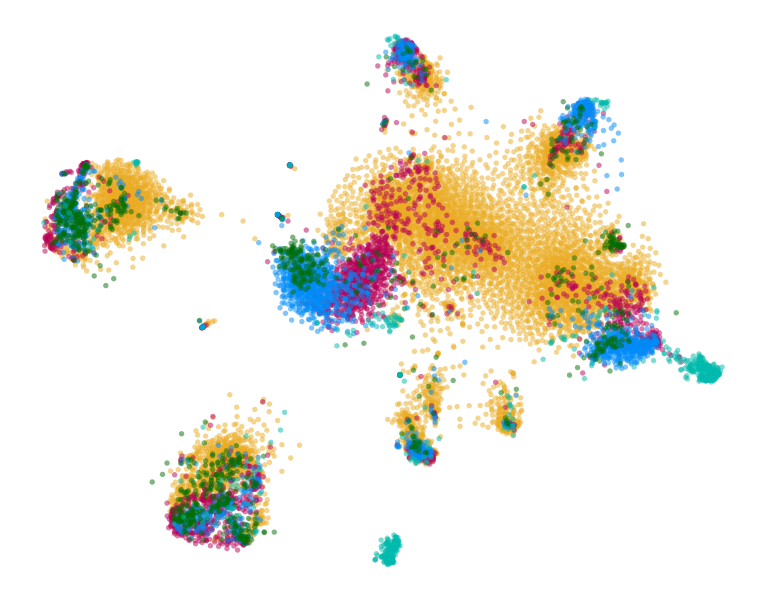

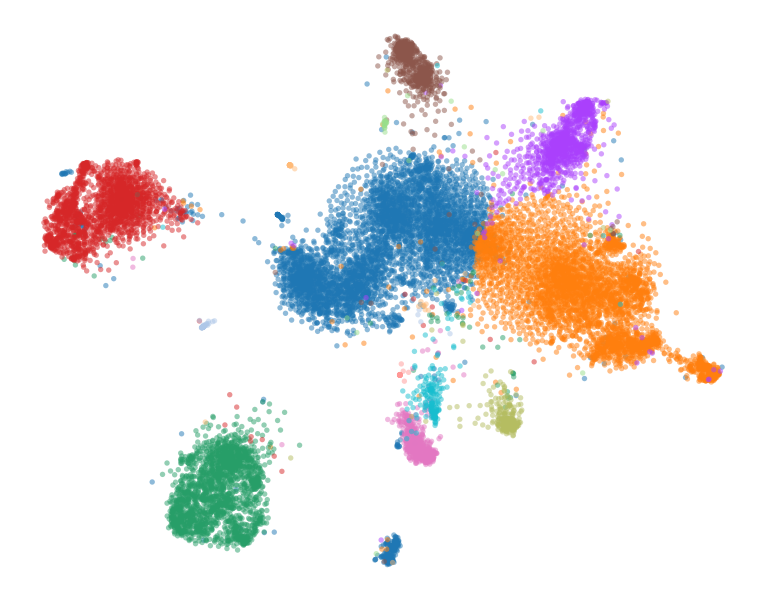

In [9]:
for cc in ["tech", "celltype"]:
    ax = plot_utils.plot_cell_embedding(
        embedding_df=rev_ctsne_results, color_col=cc, palette=palettes.get(cc, None)
    )
    plt.savefig(
        os.path.join(figure_folder, f"pancreas_{cc}_revised_ctsne.png"),
        dpi=300,
        bbox_inches="tight",
    )
